In [76]:
import optuna
import numpy as np  
import optuna.visualization as vis
import os
import plotly
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.signal import butter,filtfilt,welch
from scipy import signal
import seaborn as sns
from mne.time_frequency import psd_array_multitaper




Global Trial 1:
Study: Chi30_SW_zscore
Params: {'L': 76, 'P': 0.2416648726032133, 'Inh': 0.7865828970081202, 'Trest': 0.7363671582476021, 'Trelative': 3.5247053528377608, 'C_h': 0.3016282784791592, 'Tipo_red': 1}
Sum of Values: 22.033657824090678
---------------------------------------
Global Trial 2:
Study: Chi30_SW_zscore
Params: {'L': 74, 'P': 0.21297691195330298, 'Inh': 0.7697472471751007, 'Trest': 0.713886070534507, 'Trelative': 3.606306293420138, 'C_h': 0.3207721141296828, 'Tipo_red': 1}
Sum of Values: 23.980833180763806
---------------------------------------
Global Trial 3:
Study: Chi30_SW_zscore
Params: {'L': 74, 'P': 0.20974366161993058, 'Inh': 0.7751891426166704, 'Trest': 0.684323071663956, 'Trelative': 3.658477074073778, 'C_h': 0.371403958577144, 'Tipo_red': 1}
Sum of Values: 24.182079318340946
---------------------------------------
Frecuencia de aparición de cada estudio en los ensayos con D_eucladian<40:
Estudio Chi30_SW_zscore: 84.75 %
Estudio Chi30_Random_zscore: 15.25

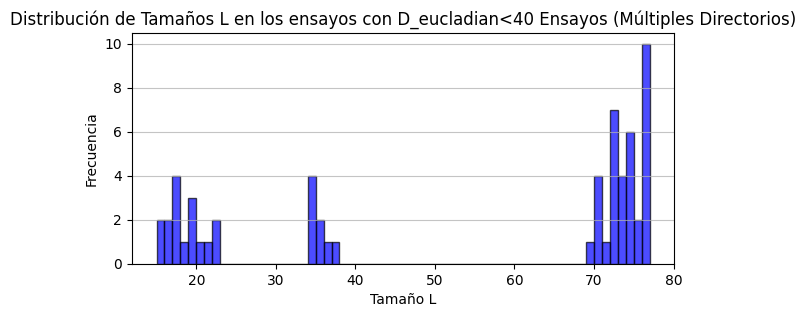

In [77]:
study_directories = ["Estudios/C"]  
storage_prefix = "sqlite:///"
all_trials_global = []

# Cargar los ensayos
for study_directory in study_directories:
    for file_name in os.listdir(study_directory):
        if file_name.endswith(".db"):  # Filtrar solo los archivos .db
            study_name = file_name.replace(".db", "")  # Nombre del estudio sin extensión
            storage_path = storage_prefix + os.path.join(study_directory, file_name)
            study = optuna.load_study(study_name=study_name, storage=storage_path)
            valid_trials = [t for t in study.trials if t.values is not None]
            for trial in valid_trials:
                trial.study_name = study_name  # Asignar el nombre del estudio al ensayo
                all_trials_global.append(trial)

# Filtrar y ordenar los mejores ensayos
d_eucli = 40  # Límite de suma de valores
filtered_trials = [t for t in all_trials_global if sum(t.values) < d_eucli]
best_trials_global = sorted(filtered_trials, key=lambda t: sum(t.values))
N_trias=len(filtered_trials)
# Mostrar los mejores 3 ensayos
for i, trial in enumerate(best_trials_global[:3]):
    print(f"Global Trial {i + 1}:")
    print("Study:", trial.study_name)
    print("Params:", trial.params)
    print("Sum of Values:", sum(trial.values))
    print("---------------------------------------")

# Análisis de frecuencias
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global if 'Tipo_red' in trial.params]
sizes = [trial.params['L'] for trial in best_trials_global if 'L' in trial.params]

# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)
size_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1

for size in sizes:
    size_frequency_count[size] += 1

# Frecuencia de estudios
print(f"Frecuencia de aparición de cada estudio en los ensayos con D_eucladian<{d_eucli}:")
for study_name, count in study_frequency_count.items():
    print(f"Estudio {study_name}: {round(count/N_trias*100,2)} %")

# Frecuencia de tipos de red
print(f"Frecuencia de cada tipo de red en los ensayos con D_eucladian<{d_eucli}:")
for network_type, count in network_type_frequency_count.items():
    print(f"Tipo de red {network_type}: {round(count/N_trias*100,2)} %")


mean_size = np.mean(sizes)
print(f"Media del tamaño L en los ensayos con D_eucladian<{d_eucli}:{mean_size}")

# Graficar distribución de tamaños L
plt.figure(figsize=(7, 3))
plt.hist(sizes, bins=range(int(min(sizes)), int(max(sizes)) + 1), alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribución de Tamaños L en los ensayos con D_eucladian<{d_eucli} Ensayos (Múltiples Directorios)')
plt.xlabel('Tamaño L')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [78]:
study_names = [trial.study_name for trial in best_trials_global]
network_types = [trial.params['Tipo_red'] for trial in best_trials_global]
sizes = [trial.params['L'] for trial in best_trials_global]  # Recopilar tamaños L
trest_values = [trial.params['Trest'] for trial in best_trials_global]  # Recopilar Trest
trela_values = [trial.params['Trelative'] for trial in best_trials_global]  # Recopilar Trest
Chiper=[trial.params['C_h'] for trial in best_trials_global]  # Recopilar Trest

P_values = [trial.params['P'] for trial in best_trials_global]  # Recopilar P
Inh_values = [trial.params['Inh'] for trial in best_trials_global]  # Recopilar P
# Contar las frecuencias
study_frequency_count = defaultdict(int)
network_type_frequency_count = defaultdict(int)

for study in study_names:
    study_frequency_count[study] += 1

for network_type in network_types:
    network_type_frequency_count[network_type] += 1
print(f"\nMedia del L: {np.mean(sizes)}")
print(f"Desviación estándar del L: {np.std(sizes)}")
print(f"Mediana del L: { np.median(sizes)}")
print(f"Primer cuartil (Q1) del L: {np.percentile(sizes, 25)}")
print(f"Tercer cuartil (Q3) del L: {np.percentile(sizes, 75)}")


print(f"\nMedia del Trest: {np.mean(trest_values)}")
print(f"Desviación estándar del Trest: {np.std(trest_values)}")
print(f"Mediana del Trest: {np.median(trest_values)}")
print(f"Primer cuartil (Q1) del Trest: {np.percentile(trest_values, 25)}")
print(f"Tercer cuartil (Q3) del Trest: {np.percentile(trest_values, 75)}")

print(f"\nMedia del Trela: {np.mean(trela_values)}")
print(f"Desviación estándar del Trela: {np.std(trela_values)}")
print(f"Mediana del Trela: {np.median(trela_values)}")
print(f"Primer cuartil (Q1) del Trela: {np.percentile(trela_values, 25)}")
print(f"Tercer cuartil (Q3) del Trela: {np.percentile(trela_values, 75)}")

print(f"\nMedia del P: {np.mean(P_values)}")
print(f"Desviación estándar del P: {np.std(P_values)}")
print(f"Mediana del P: { np.median(P_values)}")
print(f"Primer cuartil (Q1) del P: {np.percentile(P_values, 25)}")
print(f"Tercer cuartil (Q3) del P: {np.percentile(P_values, 75)}")

print(f"\nMedia del Inh: {np.mean(Inh_values)}")
print(f"Desviación estándar del Inh: {np.std(Inh_values)}")
print(f"Mediana del Inh: { np.median(Inh_values)}")
print(f"Primer cuartil (Q1) del Inh: {np.percentile(Inh_values, 25)}")
print(f"Tercer cuartil (Q3) del Inh: {np.percentile(Inh_values, 75)}")

print(f"\nMedia del C hiper: {np.mean(Chiper)}")
print(f"Desviación estándar del C hiper: {np.std(Chiper)}")
print(f"Mediana del C hiper: { np.median(Inh_values)}")
print(f"Primer cuartil (Q1) del C hiper: {np.percentile(Chiper, 25)}")
print(f"Tercer cuartil (Q3) del C hiperh: {np.percentile(Chiper, 75)}")


Media del L: 53.25423728813559
Desviación estándar del L: 25.069120190587764
Mediana del L: 71.0
Primer cuartil (Q1) del L: 22.0
Tercer cuartil (Q3) del L: 74.0

Media del Trest: 1.0051123206883688
Desviación estándar del Trest: 0.5589108437380963
Mediana del Trest: 0.8385922317254035
Primer cuartil (Q1) del Trest: 0.7535978343326196
Tercer cuartil (Q3) del Trest: 0.9217335548462688

Media del Trela: 3.746457372486491
Desviación estándar del Trela: 2.6289335835041654
Mediana del Trela: 3.606306293420138
Primer cuartil (Q1) del Trela: 1.2043729913837136
Tercer cuartil (Q3) del Trela: 4.058463203949372

Media del P: 0.27855090567986596
Desviación estándar del P: 0.1507865790523439
Mediana del P: 0.24749611625259957
Primer cuartil (Q1) del P: 0.20060965484934007
Tercer cuartil (Q3) del P: 0.27674893548818313

Media del Inh: 0.7187230753959986
Desviación estándar del Inh: 0.09640033761416565
Mediana del Inh: 0.7593225085409444
Primer cuartil (Q1) del Inh: 0.6887379552803546
Tercer cuartil

/tmp/ipykernel_7173/2665362751.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(trest_values, patch_artist=True, boxprops=dict(facecolor='lightgreen'),labels=["Trest"])
/tmp/ipykernel_7173/2665362751.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(trela_values, patch_artist=True, boxprops=dict(facecolor='lightyellow'),positions=[2],labels=['T relativo'])
/tmp/ipykernel_7173/2665362751.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(P_values, patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['P'])  # Asignar etiqueta para P
/tmp/ipykernel_7173

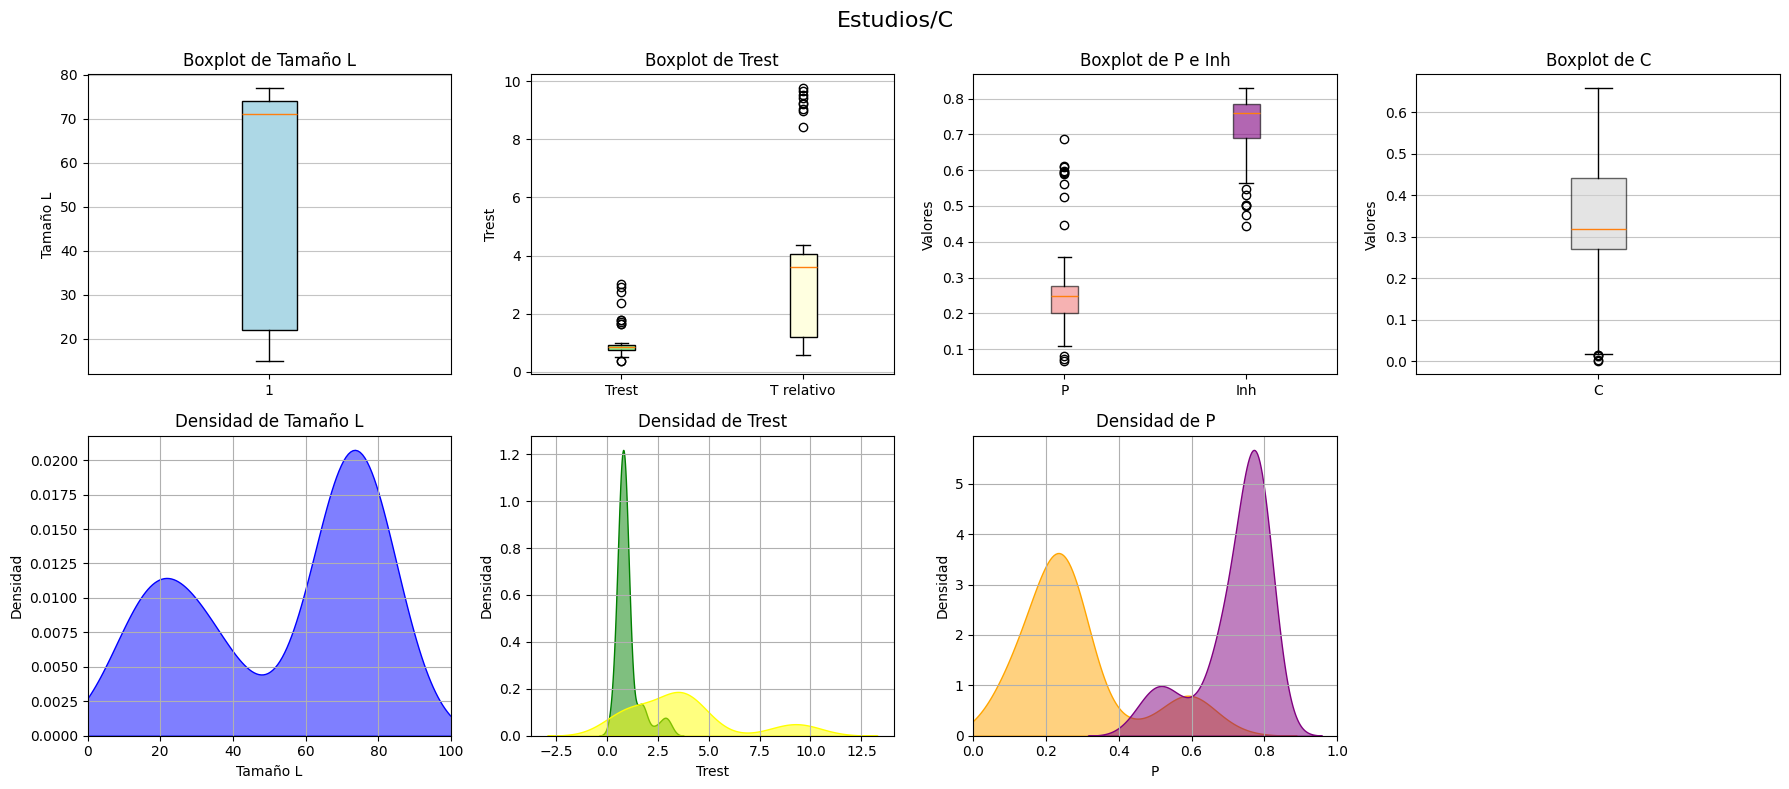

In [79]:
plt.figure(figsize=(18, 8))

# Boxplot de Tamaño L
plt.subplot(2, 4, 1)
plt.boxplot(sizes, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Tamaño L')
plt.ylabel('Tamaño L')
plt.grid(axis='y', alpha=0.75)

# Boxplot de Trest
plt.subplot(2, 4, 2)
plt.boxplot(trest_values, patch_artist=True, boxprops=dict(facecolor='lightgreen'),labels=["Trest"])
plt.boxplot(trela_values, patch_artist=True, boxprops=dict(facecolor='lightyellow'),positions=[2],labels=['T relativo'])
plt.title('Boxplot de Trest')
plt.ylabel('Trest')
plt.grid(axis='y', alpha=0.75)

# Boxplot de P
plt.subplot(2, 4, 3)
plt.boxplot(P_values, patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.6), labels=['P'])  # Asignar etiqueta para P
plt.boxplot(Inh_values, patch_artist=True, boxprops=dict(facecolor='purple', alpha=0.6), positions=[2])  # Asignar etiqueta para Inh, en posición 2
plt.title('Boxplot de P e Inh')
plt.ylabel('Valores')
plt.xticks([1, 2], ['P', 'Inh'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 4, 4)
plt.boxplot(Chiper, patch_artist=True, boxprops=dict(facecolor='lightgrey', alpha=0.6), labels=['C'])  # Asignar etiqueta para P
plt.title('Boxplot de C')
plt.ylabel('Valores')
plt.xticks([1], ['C'])  # Asignar etiquetas a los ticks del eje x
plt.grid(axis='y', alpha=0.75)


plt.subplot(2, 4, 5)
sns.kdeplot(sizes, fill=True, color='blue', alpha=0.5)
plt.title('Densidad de Tamaño L')
plt.xlabel('Tamaño L')
plt.xlim(0,100)
plt.ylabel('Densidad')
plt.grid()

# Gráfico de densidad para Trest
plt.subplot(2, 4, 6)
sns.kdeplot(trest_values, fill=True, color='green', alpha=0.5)
sns.kdeplot(trela_values, fill=True, color='yellow', alpha=0.5)
plt.title('Densidad de Trest')
plt.xlabel('Trest')
plt.ylabel('Densidad')
plt.grid()

# Gráfico de densidad para P
plt.subplot(2, 4, 7)
sns.kdeplot(P_values, fill=True, color='orange', alpha=0.5)
sns.kdeplot(Inh_values, fill=True, color='purple', alpha=0.5)
plt.title('Densidad de P')
plt.xlabel('P')
plt.xlim(0,1)
plt.ylabel('Densidad')
plt.grid()

plt.tight_layout()
plt.suptitle(study_directory, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.99])  # Ajustar para evitar superposición con el título
plt.show()


In [80]:
# Lista de carpetas donde están almacenados los estudios
Zona="C"
carpetas_estudios = [f"Estudios/{Zona}"]
output_file = f"resultados_{Zona}.txt"

# Inicializar los nombres de parámetros
param_names = []

# Buscar un archivo de ejemplo en las carpetas para extraer los nombres de parámetros
sample_study_path = None
for carpeta in carpetas_estudios:
    for archivo in os.listdir(carpeta):
        if archivo.endswith(".db"):
            sample_study_path = os.path.join(carpeta, archivo)
            break
    if sample_study_path:
        break

if sample_study_path is None:
    raise FileNotFoundError("No se encontró ningún archivo de estudio en las carpetas especificadas.")

# Cargar un estudio de ejemplo para obtener los nombres de los parámetros
sample_study_name = os.path.basename(sample_study_path).replace(".db", "")
sample_study = optuna.load_study(study_name=sample_study_name, storage=f"sqlite:///{sample_study_path}")
param_names = list(sample_study.trials[0].params.keys())

# Crear o abrir el archivo de salida
with open(output_file, "w") as f:
    header = ["Estudio", "Ensayo", "D_eucli"] + param_names
    f.write("\t".join(header) + "\n")
    for carpeta_estudios in carpetas_estudios:
        for archivo in os.listdir(carpeta_estudios):
            if archivo.endswith(".db"):
                db_path = os.path.join(carpeta_estudios, archivo)
                study_name = archivo.replace(".db", "")  # Asumimos que el nombre del archivo es el nombre del estudio
                try:
                    study = optuna.load_study(study_name=study_name, storage=f"sqlite:///{db_path}")
                    for trial in study.trials:
                        chi2_value = trial.value
                        if chi2_value is not None and not (chi2_value == float("inf") or chi2_value == float("-inf")):
                            param_values = [trial.params.get(name, "N/A") for name in param_names]
                            f.write(f"{study_name}\t{trial.number}\t{chi2_value:.4f}\t" + "\t".join(map(str, param_values)) + "\n")

                except Exception as e:
                    print(f"Error al cargar el estudio {study_name} en {carpeta_estudios}: {e}")

print(f"Resultados guardados en {output_file}")

Resultados guardados en resultados_C.txt


# Comparaciones 

In [81]:

# Directorio donde están almacenados los estudios
study_directory = "Estudios/C/"  # Ajusta según sea necesario
study_name = "Chi30_Random_zscore"  # Cambia al nombre de tu estudio
# Cargar el estudio
study = optuna.load_study(study_name=study_name, storage=f"sqlite:///{study_directory}{study_name}.db")
# Obtener el número de pruebas
num_trials = len(study.trials)

# Imprimir el número de pruebas
print(f"Número de pruebas en el estudio '{study_name}': {num_trials}")

Número de pruebas en el estudio 'Chi30_Random_zscore': 375


In [82]:
low_cutoff = 0.01  # Low cut-off frequency (Hz)
high_cutoff = 80.0  # High cut-off frequency (Hz)
order = 4  # Order of the filter
sampling_rate_equipo= 500 
b, a = signal.butter(order, [low_cutoff / (0.5 * sampling_rate_equipo), high_cutoff / (0.5 * sampling_rate_equipo)], btype='band')
fs = sampling_rate_equipo  # Sampling rate
sampling_rate = 3003 ### simulacion 


resultado_compilacion = subprocess.run("g++ -fopenmp -O3 main.cpp Matrix_conect.cpp -o main", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
if resultado_compilacion.returncode != 0:
    print("Error durante la compilación del programa:")
    print(resultado_compilacion.stderr)


def Simulado_EGG(params,Normalizacion):
    L, P, inhibidoras, trest, trelative, alpha, tmax, type_matrix = params

    # Ejecución del programa
    resultado_ejecucion_s= subprocess.run(f" OMP_NUM_THREADS=2 ./main {L} {P} {inhibidoras} {trest} {trelative} {alpha} {tmax} {type_matrix}", shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if resultado_ejecucion_s.returncode != 0:
        print("Error durante la ejecución:")
        print(resultado_ejecucion_s.stderr)
        return None
    
    # Procesamiento de los datos
    lines = resultado_ejecucion_s.stdout.strip().split('\n')

    data_list = [float(line) for line in lines]

    data = np.array(data_list)[100:]

    if(Normalizacion=="max_global"):    
        data=data/max(data)
    elif(Normalizacion=="zscore"):
        data=(data-np.mean(data))/np.std(data)

    n_samples_resampled = int(len(data)*(fs/sampling_rate))
    data_resampled = signal.resample(data, n_samples_resampled)

    butter = signal.filtfilt(b, a,data_resampled)

    psd,frequencies = psd_array_multitaper(butter, fs, fmin=0, fmax=60, adaptive=True,verbose=False,n_jobs=1)
    frequencies=np.array(frequencies)

    welch_data = np.array([10 * np.log10(psd[i]) for i in range(len(frequencies))])
    
    delta = welch_data[np.logical_and(frequencies > 0, frequencies <= 3)]
    theta = welch_data[np.logical_and(frequencies > 3, frequencies <= 7)]
    alpha = welch_data[np.logical_and(frequencies > 7, frequencies <= 14)]
    beta = welch_data[np.logical_and(frequencies > 14, frequencies <= 30)]

    return {
        'data': data,"data_resample":data_resampled,"butter": butter,
        "frequencies": frequencies,"welch_data":welch_data,
        'delta':[delta.mean(),delta.std()],
        'theta':[theta.mean(), theta.std()],
        'alpha':[ alpha.mean(),alpha.std()],
        'beta': [beta.mean(), beta.std()]
    }
def read_all_signals_from_folders(parent_folder):

    all_signals = []
    
    # Iterar sobre las subcarpetas en la carpeta principal
    for folder_name in sorted(os.listdir(parent_folder)):
        folder_path = os.path.join(parent_folder, folder_name)
        if os.path.isdir(folder_path):  # Asegurarse de que es una carpeta
            # Leer señales de la carpeta actual
            senal_uni, _ = read_signals(folder_path)
            all_signals.extend(senal_uni)  # Agregar todas las señales de esta carpeta
    
    # Concatenar todas las señales en un solo array
    all_signals_array = np.concatenate(all_signals)
    
    # Calcular valores globales
    global_min = np.min(all_signals_array)
    global_max = np.max(all_signals_array)
    global_mean = np.mean(all_signals_array)
    global_std = np.std(all_signals_array)
    
    return all_signals_array, global_min, global_max, global_mean, global_std

def read_signals(folder_path):
    signals = []
    file_names = []
    for file_name in sorted(os.listdir(folder_path)):  # Ordenar los archivos por nombre
        if file_name.endswith(".txt"):  # Filtrar solo archivos de texto
            file_path = os.path.join(folder_path, file_name)
            signal_i = np.loadtxt(file_path)  # Leer los datos del archivo
            signals.append(signal_i)
            file_names.append(file_name)  # Guardar el nombre del archivo
    return signals, file_names

def euclidean_distance(function1, function2):
    return np.sqrt(np.sum((np.array(function1) - np.array(function2))**2))

parent_folder = "Datos_reales"
all_signals_array, global_min, global_max, global_mean, global_std = read_all_signals_from_folders(parent_folder)

# Imprimir resultados
print("Número total de señales:", len(all_signals_array))
print("Mínimo global:", global_min)
print("Máximo global:", global_max)
print("Media global:", global_mean)
print("Desviación estándar global:", global_std)
def Datos_reales(directorio,Normalizacion, global_min, global_max, global_mean, global_std):
    Datos,nombres= read_signals(directorio)
    Butter = np.empty(len(nombres), dtype=object)
    welch_datos = np.empty(len(nombres), dtype=object)
    Frequencies = np.empty(len(nombres), dtype=object)
    Delta = np.zeros((len(nombres), 2)) 
    Theta = np.zeros((len(nombres), 2)) 
    Alpha = np.zeros((len(nombres), 2)) 
    Beta = np.zeros((len(nombres), 2)) 
    if(Normalizacion=="max_global"):    
            Datos=Datos/global_max
    elif(Normalizacion=="zscore"):
        Datos=(Datos-global_mean) / global_std
    for i in range(len(Datos)):
        Butter[i]=butter= signal.filtfilt(b, a,Datos[i])
        psd,frequencies = psd_array_multitaper(butter, fs, fmin=0, fmax=60, adaptive=True,verbose=False,n_jobs=1)
        Frequencies[i]=frequencies=np.array(frequencies)
        welch_data = np.array([10 * np.log10(psd[i]) for i in range(len(frequencies))])
        welch_datos[i]=welch_data
        delta = welch_data[np.logical_and(frequencies > 0, frequencies <= 3)]
        theta = welch_data[np.logical_and(frequencies > 3, frequencies <= 7)]
        alpha = welch_data[np.logical_and(frequencies > 7, frequencies <= 14)]
        beta = welch_data[np.logical_and(frequencies > 14, frequencies <= 30)]
        Delta[i]=np.array([delta.mean(),delta.std()])
        Theta[i]=[theta.mean(),theta.std()]
        Alpha[i]=[alpha.mean(),alpha.std()]
        Beta[i]=[beta.mean(),beta.std()]
    mean_welch=np.mean(welch_datos)
    mean_Delta=[Delta[:,0].mean(),np.mean(Delta[:,1])]
    mean_Theta=[Theta[:,0].mean(),np.mean(Theta[:,1])]
    mean_Alpha=[Alpha[:,0].mean(),np.mean(Alpha[:,1])]
    mean_Beta=[Beta[:,0].mean(),np.mean(Beta[:,1])]
    return {
        "Nombres":nombres,"Zona":directorio,
        'datos': Datos, "frequencies": Frequencies,  "welch_data":welch_datos,"mean_welch":mean_welch,
        'delta':Delta,'theta':Theta,'alpha':Alpha,'beta':Beta,
        'mean_Delta': mean_Delta,'mean_Theta':mean_Theta,"mean_Alpha":mean_Alpha,"mean_Beta":mean_Beta
    }



Número total de señales: 32000
Mínimo global: -7.5019798015625e-05
Máximo global: 3.7541179509375e-05
Media global: -1.8103846518043457e-05
Desviación estándar global: 1.8481663638416723e-05


In [83]:
Params= {'L': 74, 'P': 0.20974366161993058, 'Inh': 0.7751891426166704, 'Trest': 0.684323071663956, 'Trelative': 3.658477074073778, 'C_h': 0.371403958577144, 'Tipo_red': 1}

initial_params = [Params["L"], Params["P"],Params["Inh"], Params["Trest"],Params["Trelative"], Params["C_h"] ,12112, Params["Tipo_red"]]

Normalizacion="zscore"###"max_global""max_global_abs" zscore

generated_C= Simulado_EGG(initial_params,Normalizacion)
reales_C = Datos_reales(f"Datos_reales/C",Normalizacion, global_min, global_max, global_mean, global_std)
reales_F = Datos_reales(f"Datos_reales/F",Normalizacion, global_min, global_max, global_mean, global_std)
reales_P = Datos_reales(f"Datos_reales/P",Normalizacion, global_min, global_max, global_mean, global_std)
reales_T = Datos_reales(f"Datos_reales/T",Normalizacion, global_min, global_max, global_mean, global_std)
Deucli_c = euclidean_distance(generated_C["welch_data"][:121],reales_C["mean_welch"][:121])
Deucli_f= euclidean_distance(generated_C["welch_data"][:121],reales_F["mean_welch"][:121])
Deucli_p = euclidean_distance(generated_C["welch_data"][:121],reales_P["mean_welch"][:121])
Deucli_t= euclidean_distance(generated_C["welch_data"][:121],reales_T["mean_welch"][:121])

print(Deucli_c)
print(Deucli_f)
print(Deucli_p)
print(Deucli_t)

KeyboardInterrupt: 

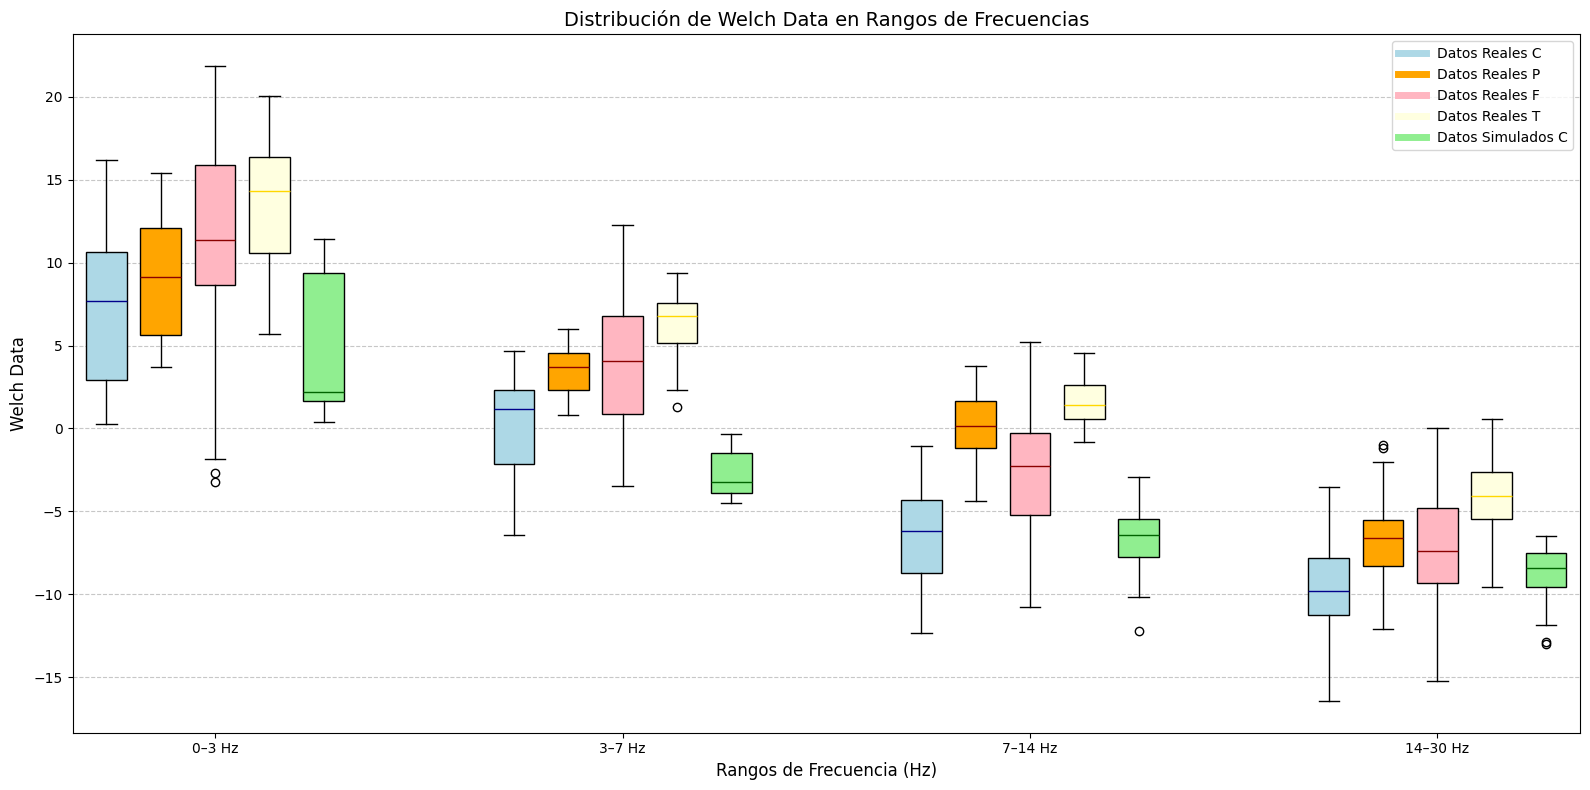

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir rangos de frecuencia y etiquetas
frequency_ranges = [(0, 3), (3, 7), (7, 14), (14, 30)]
labels = ["0–3 Hz", "3–7 Hz", "7–14 Hz", "14–30 Hz"]

# Extraer frecuencias y PSD
frequencies = np.array(generated_C["frequencies"]).flatten()  # Asegurar que sea 1D
welch_data_C = np.array(reales_C["welch_data"])  # PSD reales C (2D: señales x frecuencias)
welch_data_P = np.array(reales_P["welch_data"])  # PSD reales P (2D: señales x frecuencias)
welch_data_F = np.array(reales_F["welch_data"])  # PSD reales F (2D: señales x frecuencias)
welch_data_T = np.array(reales_T["welch_data"])  # PSD reales T (2D: señales x frecuencias)
psd_simulado_C = np.array(generated_C["welch_data"]).flatten()  # PSD simulado como array 1D

# Inicializar contenedores para cada rango y categoría
categories = ["C", "P", "F", "T"]
welch_data_by_range = {cat: [[] for _ in range(len(frequency_ranges))] for cat in categories}
welch_data_by_range["Sim_C"] = [[] for _ in range(len(frequency_ranges))]

# Calcular los datos para cada rango y categoría
for idx, (f_min, f_max) in enumerate(frequency_ranges):
    mask = (frequencies > f_min) & (frequencies <= f_max)  # Máscara lógica
    for signal_real_C in welch_data_C:
        welch_data_by_range["C"][idx].extend(signal_real_C[mask])
    for signal_real_P in welch_data_P:
        welch_data_by_range["P"][idx].extend(signal_real_P[mask])
    for signal_real_F in welch_data_F:
        welch_data_by_range["F"][idx].extend(signal_real_F[mask])
    for signal_real_T in welch_data_T:
        welch_data_by_range["T"][idx].extend(signal_real_T[mask])
    welch_data_by_range["Sim_C"][idx].extend(psd_simulado_C[mask])

# Configuración de posiciones en el gráfico
positions_C = np.arange(len(labels)) * 6.0  # Posiciones para datos reales C
positions_P = positions_C + 0.8            # Posiciones para datos reales P
positions_F = positions_C + 1.6            # Posiciones para datos reales F
positions_T = positions_C + 2.4            # Posiciones para datos reales T
positions_sim_C = positions_C + 3.2        # Posiciones para datos simulados C

# Graficar los datos
plt.figure(figsize=(16, 8))

# Boxplot para datos reales C
plt.boxplot(welch_data_by_range["C"], positions=positions_C, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="darkblue"),
            widths=0.6)

# Boxplot para datos reales P
plt.boxplot(welch_data_by_range["P"], positions=positions_P, patch_artist=True,
            boxprops=dict(facecolor="orange"), medianprops=dict(color="darkred"),
            widths=0.6)

# Boxplot para datos reales F
plt.boxplot(welch_data_by_range["F"], positions=positions_F, patch_artist=True,
            boxprops=dict(facecolor="lightpink"), medianprops=dict(color="darkred"),
            widths=0.6)

# Boxplot para datos reales T
plt.boxplot(welch_data_by_range["T"], positions=positions_T, patch_artist=True,
            boxprops=dict(facecolor="lightyellow"), medianprops=dict(color="gold"),
            widths=0.6)

# Boxplot para datos simulados C
plt.boxplot(welch_data_by_range["Sim_C"], positions=positions_sim_C, patch_artist=True,
            boxprops=dict(facecolor="lightgreen"), medianprops=dict(color="darkgreen"),
            widths=0.6)

# Ajustar las posiciones en el eje x
xticks_positions = positions_C + 1.6  # Centrar las etiquetas de los rangos
plt.xticks(xticks_positions, labels)

# Títulos y leyendas
plt.title("Distribución de Welch Data en Rangos de Frecuencias", fontsize=14)
plt.xlabel("Rangos de Frecuencia (Hz)", fontsize=12)
plt.ylabel("Welch Data", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

colors = [
    ("Datos Reales C", "lightblue"),
    ("Datos Reales P", "orange"),
    ("Datos Reales F", "lightpink"),
    ("Datos Reales T", "lightyellow"),
    ("Datos Simulados C", "lightgreen"),
]
handles = [plt.Line2D([0], [0], color=color, lw=5) for _, color in colors]
labels = [label for label, _ in colors]
plt.legend(handles, labels, loc="upper right", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
